In [1]:
import math
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=2, random_state=42, cluster_std=2.0)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.3)

In [4]:
# Step 1: Calculate Euclidean Distance.
# Step 2: Get Nearest Neighbors.
# Step 3: Make Predictions.

In [5]:
class MKNN:
    # Set number of neighbors
    def __init__(self, n_neighbors= 2): 
        self.n_neighbors = n_neighbors
    
    # Euclidian dinstance
    def dist(self, a, b):
        dis = (a - b)** 2 
        return math.sqrt(sum(dis))
      
    # Most common function
    def most_frequent(self, List): 
        counter = 0
        num = List[0] 
        for i in List: 
            curr_frequency = List.count(i) 
            if(curr_frequency> counter): 
                counter = curr_frequency 
                num = i 
        return num 
    
    # Train, fit 
    def fit(self, X, y):      
        self.X = X   
        self.y = y
        
    # Predict    
    def predict(self, X):
        predictions = [] 
        for sample in X:     
            distances = []                          
            for x in self.X:             
                distances.append(self.dist(sample,x))  
            
            index_list = list(range(len(distances)))          
            for i in range(len(distances)):
                for j in range(len(distances)- i -1):
                    if distances[j] > distances[j+1]:
                        distances[j], distances[j+1] = distances[j+1], distances[j]
                        index_list[j], index_list[j+1] = index_list[j+1], index_list[j]                        
            nearest_neigbors = list(self.y[index_list[:self.n_neighbors]])
            predictions.append(self.most_frequent(nearest_neigbors))
        return predictions

In [6]:
k_range = list(range(1, 5))
scores = []
for k in k_range:    
    MKN = MKNN(k)
    MKN.fit(X_train, y_train)
    y_pred = MKN.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

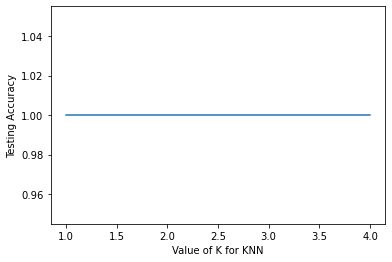

In [7]:
# Plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [8]:
print(f'Accuracy score {accuracy_score(y_test, y_pred) * 100}% ')

Accuracy score 100.0% 


In [9]:
MKN = MKNN(5)
MKN.fit(X_train, y_train)
y_pred = MKN.predict(X_test)

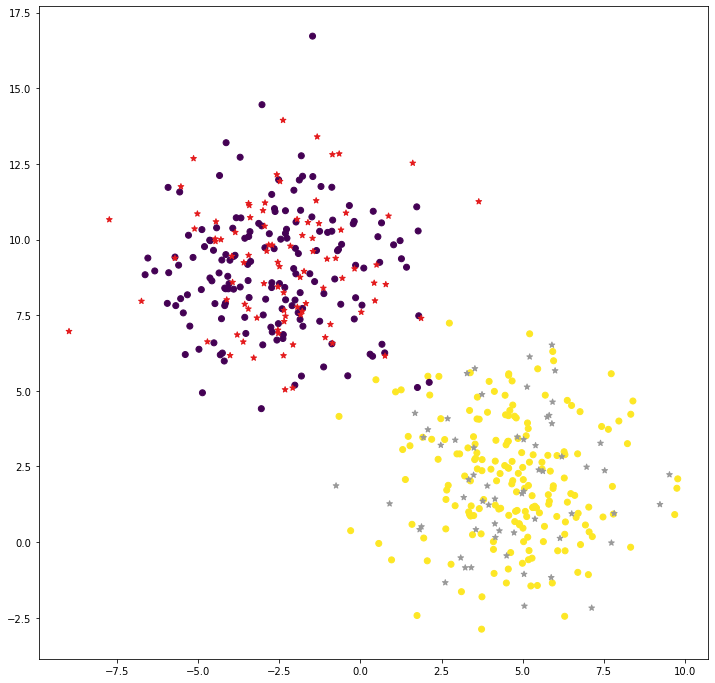

In [10]:
fig = plt.figure(figsize=(12,12))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='*',cmap='Set1')
plt.show()